In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
#Check out the data
USAhousing=pd.read_csv("USA_Housing.csv")
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

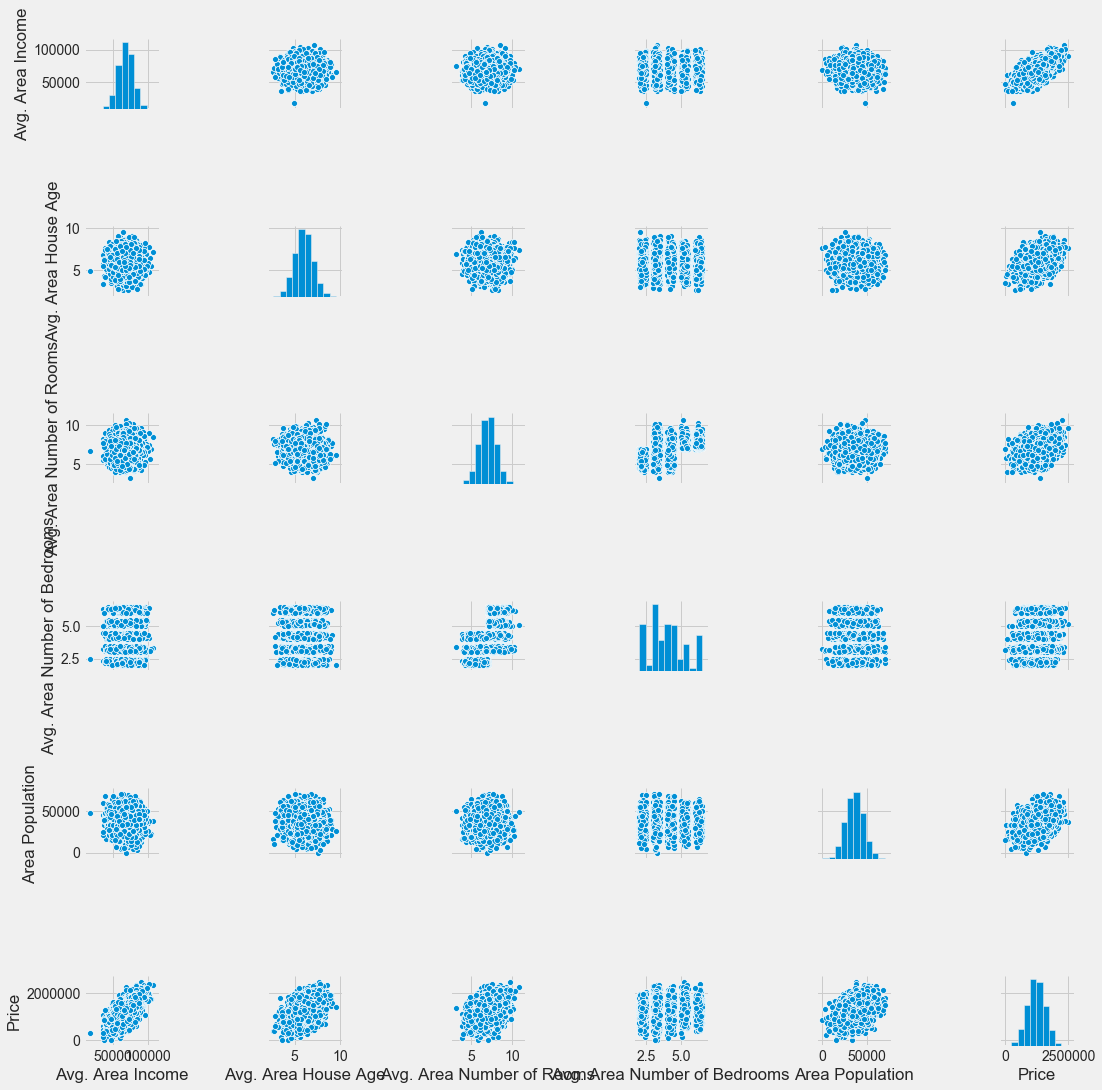

In [7]:
#Exploratory Data Analysis(EDA)
sns.pairplot(USAhousing)

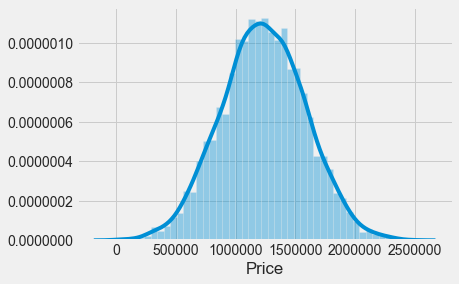

In [8]:
sns.distplot(USAhousing["Price"])

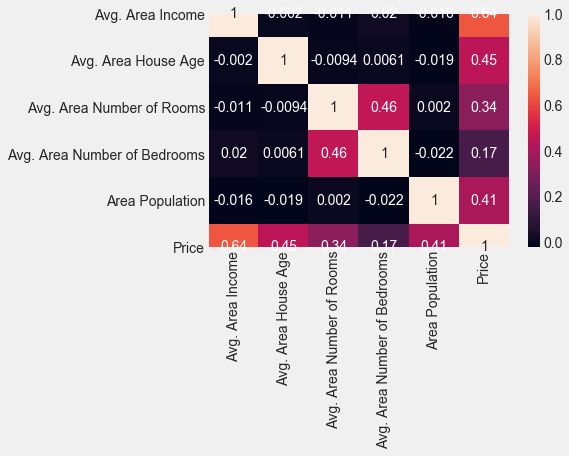

In [9]:
sns.heatmap(USAhousing.corr(),annot=True)

In [10]:
#Training a Linear Regression Model
X=USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y=USAhousing["Price"]

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred=cross_val_score(model,X,y,cv=10)
    return pred.mean()

def print_evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("R2 Square:",r2_square)
    
def evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [13]:
#Preparing Data for Linear Regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("std_scalar",StandardScaler())])

X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [14]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
#Model Evaluation
print(lin_reg.intercept_)

1228219.1492415662


In [16]:
coeff_df=pd.DataFrame(lin_reg.coef_,X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [17]:
#Predictions from our Model
pred=lin_reg.predict(X_test)

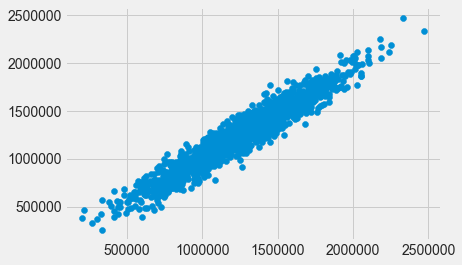

In [18]:
plt.scatter(y_test,pred)

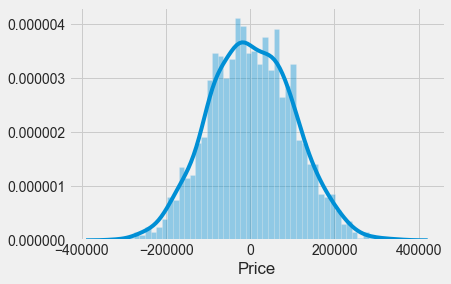

In [19]:
sns.distplot((y_test-pred),bins=50);

In [20]:
test_pred=lin_reg.predict(X_test)
train_pred=lin_reg.predict(X_train)

print("Test set evalutation:\n-------------------------")
print_evaluate(y_test,test_pred)
print("===============================")
print("Train set evaluation:\n---------------------------")
print_evaluate(y_train,train_pred)

Test set evalutation:
-------------------------
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square: 0.9146818498754016
Train set evaluation:
---------------------------
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square: 0.9192986579075526


In [21]:
results_df=pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,test_pred),
                               cross_val(LinearRegression())]],columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


In [23]:
#Robust Regression
from sklearn.linear_model import RANSACRegressor

model=RANSACRegressor(base_estimator=LinearRegression(),max_trials=100)
model.fit(X_train,y_train)

test_pred=model.predict(X_test)
train_pred=model.predict(X_train)

print("Test set evaluation:\n--------------------")
print_evaluate(y_test,test_pred)
print("==========================")
print("Train set evaluation:\n---------------------")
print_evaluate(y_train,train_pred)

Test set evaluation:
--------------------
MAE: 88642.66282191648
MSE: 12350666139.251692
RMSE: 111133.55091623633
R2 Square: 0.8953424945737049
Train set evaluation:
---------------------
MAE: 89667.29345149251
MSE: 12384806787.299671
RMSE: 111287.04680824121
R2 Square: 0.9028418065687968


In [26]:
results_df_2=pd.DataFrame(data=[["Robust Regression",*evaluate(y_test,test_pred),cross_val(RANSACRegressor())]],
                         columns=["Model","MAE","MSE","RMSE","R2_Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916


In [27]:
#Ridge Regression
from sklearn.linear_model import Ridge

model=Ridge(alpha=100,solver="cholesky",tol=0.0001,random_state=42)
model.fit(X_train,y_train)
pred=model.predict(X_test)

test_pred=model.predict(X_test)
train_pred=model.predict(X_train)

print("Test set evaluation:\n--------------------")
print_evaluate(y_test,test_pred)
print("=========================")
print("Train set evaluation:\n----------------------")
print_evaluate(y_train,train_pred)

Test set evaluation:
--------------------
MAE: 81428.64835535336
MSE: 10153269900.892614
RMSE: 100763.43533689497
R2 Square: 0.9139628674464606
Train set evaluation:
----------------------
MAE: 81972.39058585512
MSE: 10382929615.143461
RMSE: 101896.66145239235
R2 Square: 0.9185464334441484


In [28]:
results_df_2=pd.DataFrame(data=[["Ridge Regression",*evaluate(y_test,test_pred),cross_val(Ridge())]],
                          columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,0.913963,NaN,100763.435337


In [29]:
#Lasso Regression
from sklearn.linear_model import Lasso

model=Lasso(alpha=0.1,precompute=True,selection="random",random_state=42)
model.fit(X_train,y_train)

test_pred=model.predict(X_test)
train_pred=model.predict(X_train)

print("Test set evaluation:\n------------------")
print_evaluate(y_test,test_pred)
print("=======================")
print("Train set evaluation:\n---------------------")
print_evaluate(y_train,train_pred)

Test set evaluation:
------------------
MAE: 81135.56550168266
MSE: 10068422205.413666
RMSE: 100341.52782080641
R2 Square: 0.9146818528072401
Train set evaluation:
---------------------
MAE: 81480.50106812021
MSE: 10287043161.239983
RMSE: 101425.06180052336
R2 Square: 0.9192986579072171


In [30]:
results_df_2=pd.DataFrame(data=[["Lasso Regression",*evaluate(y_test,test_pred),cross_val(Lasso())]],
                         columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,0.914682,NaN,100341.527821


In [32]:
#Elastic Net
from sklearn.linear_model import ElasticNet

model=ElasticNet(alpha=0.1,l1_ratio=0.9,selection="random",random_state=42)
model.fit(X_train,y_train)

test_pred=model.predict(X_test)
train_pred=model.predict(X_train)

print("Test set evaluation:\n--------------------")
print_evaluate(y_test,test_pred)
print("=======================")
print("Train set evaluation:\n----------------------")
print_evaluate(y_train,train_pred)

Test set evaluation:
--------------------
MAE: 81184.43147330945
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square: 0.9146002670381437
Train set evaluation:
----------------------
MAE: 81577.88831531756
MSE: 10299274948.101461
RMSE: 101485.34351373829
R2 Square: 0.9192027001474953


In [33]:
results_df_2=pd.DataFrame(data=[["Elastic Net Regression",*evaluate(y_test,test_pred),cross_val(ElasticNet())]],
                         columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,0.914682,NaN,100341.527821
4,0.879545,81184.431473,1.007805e+10,Elastic Net Regression,0.914600,NaN,100389.492321


In [35]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_train_2_d=poly_reg.fit_transform(X_train)
X_test_2_d=poly_reg.transform(X_test)

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred=lin_reg.predict(X_test_2_d)
train_pred=lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119698
MSE: 10081983997.620707
RMSE: 100409.08324260662
R2 Square: 0.9145669324195059
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007814
RMSE: 101323.67517519198
R2 Square: 0.9194599187853729


In [36]:
results_df_2=pd.DataFrame(data=[["Polynomial Regression",*evaluate(y_test,test_pred),0]],
                         columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,0.914682,NaN,100341.527821
4,0.879545,81184.431473,1.007805e+10,Elastic Net Regression,0.914600,NaN,100389.492321
5,0.000000,81174.518441,1.008198e+10,Polynomial Regression,0.914567,NaN,100409.083243


In [38]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(n_iter_no_change=250,penalty=None,eta0=0.0001,max_iter=100000)
sgd_reg.fit(X_train,y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.5672461171
MSE: 10068422429.919424
RMSE: 100341.5289395145
R2 Square: 0.9146818509048154
Train set evaluation:
_____________________________________
MAE: 81480.50139176383
MSE: 10287043161.236504
RMSE: 101425.06180050621
R2 Square: 0.9192986579072444


In [39]:
results_df_2=pd.DataFrame(data=[["Stochastic Gradient Descent",*evaluate(y_test,test_pred),0]],
                         columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,0.914682,NaN,100341.527821
4,0.879545,81184.431473,1.007805e+10,Elastic Net Regression,0.914600,NaN,100389.492321
5,0.000000,81174.518441,1.008198e+10,Polynomial Regression,0.914567,NaN,100409.083243
6,0.000000,81135.567246,1.006842e+10,Stochastic Gradient Descent,0.914682,NaN,100341.528940


In [40]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train,y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94218.58493738451
MSE: 14150369107.571762
RMSE: 118955.32399843128
R2 Square: 0.8800921088010643
Train set evaluation:
_____________________________________
MAE: 35399.55934993907
MSE: 2000465946.7957525
RMSE: 44726.568690161694
R2 Square: 0.9843064441174302


In [42]:
results_df_2=pd.DataFrame(data=[["Random Forest Regressor",*evaluate(y_test,test_pred),0]],
                         columns=["Model","MAE","MSE","RMSE","R2 Sqaure","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Sqaure,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,NaN,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,NaN,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,NaN,0.914682,NaN,100341.527821
4,0.879545,81184.431473,1.007805e+10,Elastic Net Regression,NaN,0.914600,NaN,100389.492321
5,0.000000,81174.518441,1.008198e+10,Polynomial Regression,NaN,0.914567,NaN,100409.083243
6,0.000000,81135.567246,1.006842e+10,Stochastic Gradient Descent,NaN,0.914682,NaN,100341.528940
7,0.000000,94218.584937,1.415037e+10,Random Forest Regressor,0.880092,NaN,NaN,118955.323998


In [44]:
#Support Vector Machine
from sklearn.svm import SVR

svm_reg=SVR(kernel="rbf",C=1000000,epsilon=0.001)
svm_reg.fit(X_train,y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051513638
MSE: 11720932765.132305
RMSE: 108263.25676392848
R2 Square: 0.9006787511995367
Train set evaluation:
_____________________________________
MAE: 73692.56848247407
MSE: 9363827731.341503
RMSE: 96766.87310924903
R2 Square: 0.9265412370493262


In [45]:
results_df_2=pd.DataFrame(data=[["SVM Regressor",*evaluate(y_test,test_pred),0]],
                         columns=["Model","MAE","MSE","RMSE","R2 Square","Cross Validation"])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

C:\anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Cross Validation,MAE,MSE,Model,R2 Sqaure,R2 Square,R2_Square,RMSE
0,0.917379,81135.566093,1.006842e+10,Linear Regression,NaN,0.914682,NaN,100341.529545
1,0.911008,88642.662822,1.235067e+10,Robust Regression,NaN,NaN,0.895342,111133.550916
2,0.917379,81428.648355,1.015327e+10,Ridge Regression,NaN,0.913963,NaN,100763.435337
3,0.917379,81135.565502,1.006842e+10,Lasso Regression,NaN,0.914682,NaN,100341.527821
4,0.879545,81184.431473,1.007805e+10,Elastic Net Regression,NaN,0.914600,NaN,100389.492321
5,0.000000,81174.518441,1.008198e+10,Polynomial Regression,NaN,0.914567,NaN,100409.083243
6,0.000000,81135.567246,1.006842e+10,Stochastic Gradient Descent,NaN,0.914682,NaN,100341.528940
7,0.000000,94218.584937,1.415037e+10,Random Forest Regressor,0.880092,NaN,NaN,118955.323998
8,0.000000,87205.730515,1.172093e+10,SVM Regressor,NaN,0.900679,NaN,108263.256764


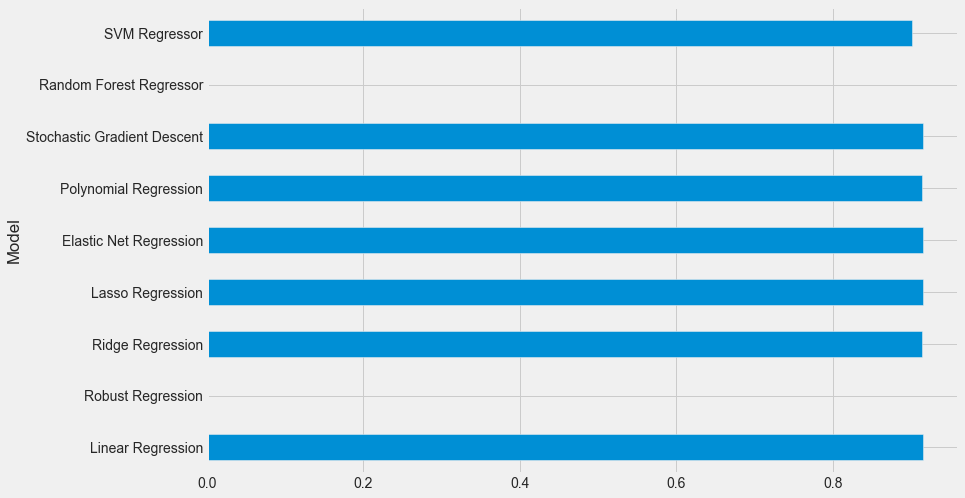

In [46]:
#Model Comparison
results_df.set_index("Model",inplace=True)
results_df["R2 Square"].plot(kind="barh",figsize=(12,8))